In [727]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [728]:
words = open('names.txt', 'r').read().splitlines()

In [729]:
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [730]:
len(words)

32033

In [731]:
chars = sorted(list(set(''.join(words))))
stoi = {ch: i+1 for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i: ch for ch, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [732]:
block_size = 3
x, y = [], []
for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        x.append(context)
        y.append(ix)
        #print(''.join ([itos[i] for i in context]), '-->', itos[ix])
        context = context[1:] + [ix]
        
x = torch.tensor(x)
y = torch.tensor(y)

In [733]:
def buildDataset(words):
    block_size = 3
    x, y = [], []
    for w in words:
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            x.append(context)
            y.append(ix)
            #print(''.join ([itos[i] for i in context]), '-->', itos[ix])
            context = context[1:] + [ix]
            
    x = torch.tensor(x)
    y = torch.tensor(y)
    print(x.shape, y.shape)
    return x, y
import random
random.seed(42)
random.shuffle(words)
n1 = int (len(words)*.8)    
n2 = int (len(words)*.9)    
x_train, y_train = buildDataset(words[:n1])
x_val, y_val = buildDataset(words[n1:n2])
x_test, y_test = buildDataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [734]:
x_train.shape, y_train.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [735]:
C = torch.randn(27,10)
C

tensor([[ 0.9708,  0.9502,  1.1376,  0.2378,  1.1633, -0.5443,  1.0207,  0.4426,
         -0.1448, -0.4958],
        [-0.3642,  0.6860,  0.1976,  0.2413, -1.0751, -0.4325,  1.3032,  1.1420,
          0.0820,  1.1566],
        [ 0.3961, -1.1990, -0.7096, -0.3220, -1.7196,  0.0643, -0.3234, -0.7036,
         -2.0251,  0.4557],
        [-1.4959,  2.1213, -1.0824, -0.3076, -1.4671, -0.4699,  0.7049,  0.2058,
         -0.0408, -0.2229],
        [-0.0658,  0.4350, -1.0055,  0.0813, -0.5989,  0.1764, -0.2891,  0.5553,
         -0.8623, -1.0883],
        [-0.2877, -1.5005,  0.1639,  0.7346, -0.6162,  0.3797,  1.0638,  0.2033,
         -0.1548,  0.3130],
        [-0.2219,  1.1939,  1.7462, -0.3130,  0.3638,  0.2147, -1.0649,  1.7555,
          0.6464,  0.5058],
        [ 1.4420, -0.0926,  0.0728,  0.0913, -1.6923, -0.1312, -0.0747, -1.5829,
          0.4283,  0.3083],
        [ 1.1371, -1.1256,  0.3953,  0.6916,  0.1298,  1.0056, -0.3048, -0.0915,
         -0.5309, -0.2909],
        [-1.0261, -

In [736]:
C[[7, 5, 6, 7]]

tensor([[ 1.4420, -0.0926,  0.0728,  0.0913, -1.6923, -0.1312, -0.0747, -1.5829,
          0.4283,  0.3083],
        [-0.2877, -1.5005,  0.1639,  0.7346, -0.6162,  0.3797,  1.0638,  0.2033,
         -0.1548,  0.3130],
        [-0.2219,  1.1939,  1.7462, -0.3130,  0.3638,  0.2147, -1.0649,  1.7555,
          0.6464,  0.5058],
        [ 1.4420, -0.0926,  0.0728,  0.0913, -1.6923, -0.1312, -0.0747, -1.5829,
          0.4283,  0.3083]])

In [737]:
C[x]

tensor([[[ 0.9708,  0.9502,  1.1376,  ...,  0.4426, -0.1448, -0.4958],
         [ 0.9708,  0.9502,  1.1376,  ...,  0.4426, -0.1448, -0.4958],
         [ 0.9708,  0.9502,  1.1376,  ...,  0.4426, -0.1448, -0.4958]],

        [[ 0.9708,  0.9502,  1.1376,  ...,  0.4426, -0.1448, -0.4958],
         [ 0.9708,  0.9502,  1.1376,  ...,  0.4426, -0.1448, -0.4958],
         [-0.2877, -1.5005,  0.1639,  ...,  0.2033, -0.1548,  0.3130]],

        [[ 0.9708,  0.9502,  1.1376,  ...,  0.4426, -0.1448, -0.4958],
         [-0.2877, -1.5005,  0.1639,  ...,  0.2033, -0.1548,  0.3130],
         [-0.1941,  1.2525, -0.3413,  ..., -0.8635, -1.1305,  1.1060]],

        ...,

        [[-0.1738, -0.6228,  2.0529,  ..., -0.5557,  2.4228,  1.6196],
         [-0.1738, -0.6228,  2.0529,  ..., -0.5557,  2.4228,  1.6196],
         [-1.3711, -0.0764, -0.3671,  ...,  1.3332, -0.7369,  1.3294]],

        [[-0.1738, -0.6228,  2.0529,  ..., -0.5557,  2.4228,  1.6196],
         [-1.3711, -0.0764, -0.3671,  ...,  1.3332, -0.

In [738]:
emb = C[x_train]
emb.shape

torch.Size([182625, 3, 10])

In [739]:
W1 = torch.randn(30, 200)
B1 = torch.randn(200)

In [740]:
emb[:, 0, :].shape, emb[:, 1, :].shape, emb[:, 2, :].shape

(torch.Size([182625, 10]), torch.Size([182625, 10]), torch.Size([182625, 10]))

In [741]:
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

In [742]:
# torch.cat(emb.unbind(dim=1), dim=1).shape

In [743]:
emb.view(-1, 30) == torch.cat(emb.unbind(dim=1), dim=1)

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [744]:
h = torch.tanh(emb.view(-1, 30) @ W1 + B1)

In [745]:
W2 = torch.randn(200, 27)
B2 = torch.randn(27)

In [746]:
logits = h @ W2 + B2

In [747]:
counts = logits.exp()

In [748]:
prob = counts / counts.sum(dim=1, keepdim=True)

In [749]:
prob.shape

torch.Size([182625, 27])

In [750]:
parameters = [C, W1, B1, W2, B2]

In [751]:
loss = F.cross_entropy(logits, y_train)
loss

tensor(25.6356)

In [752]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
for p in parameters:
    if p.grad is not None:
        p.grad = p.grad.detach()

In [753]:
# Ensure requires_grad is set to True for all parameters
for p in parameters:
    p.requires_grad = True
lri, lossi,stepi =  [], [], []

for i in range(50000):
    # Constructing a mini-batch
    ix = torch.randint(0, len(x_train), (32,))
    emb = C[x_train[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + B1)
    logits = h @ W2 + B2
    loss = F.cross_entropy(logits, y_train[ix])
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = .1
    for p in parameters:
        p.data += -lr * p.grad
    stepi.append(i)
    #lri.append(lre[i])
    lossi.append(loss.log10().item())

print(loss.item())


2.5068817138671875


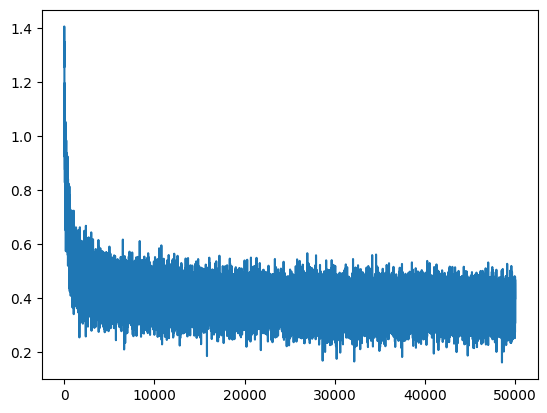

In [754]:
plt.plot(stepi, lossi)

In [755]:
emb = C[x_val]
h = torch.tanh(emb.view(-1, 30) @ W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits, y_val)
loss.item()

2.383742094039917

In [756]:
torch.randint(0, x.shape[0], (32,))

tensor([ 42599, 166643, 182076, 130923, 104603, 208713,  74971,  22557,  59017,
         68077,  86561,  42528, 107476,  93009, 204947, 211471, 168476,  13078,
        166709,  99405, 225421, 225144, 218719, 206409,  53193,  50165,  26426,
        126518,  23848,  43446,  38124, 131460])

In [757]:
# spliting the data into training, validation, and test sets
#                        0.8       0.1             0.1

In [758]:
buildDataset(words)

torch.Size([228146, 3]) torch.Size([228146])


(tensor([[ 0,  0,  0],
         [ 0,  0, 25],
         [ 0, 25, 21],
         ...,
         [15, 22,  1],
         [22,  1, 14],
         [ 1, 14,  9]]),
 tensor([25, 21,  8,  ..., 14,  9,  0]))

In [767]:
for _ in range(10):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor(context)]
        h = torch.tanh(emb.view(1,-1) @ W1 + B1)
        logits = h @ W2 + B2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, 1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
        
    print(''.join([itos[i] for i in out]))

coddan.
blani.
sabettyxt.
adten.
kaevonna.
min.
suriamyssori.
javane.
maxindom.
hima.
